In [68]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Importing Data file
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
dataset = pd.DataFrame(data)
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [69]:
dataset.shape

(5000, 14)

In [70]:
# check for categorical data. there is none.
dataset.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [71]:
# verifying the 9% of the customers that applied for home loan. 0 means customer did not apply, 1 means customer applied 
# for home loan 
dataset["Personal Loan"].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

In [73]:
# Finding the data distribution
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


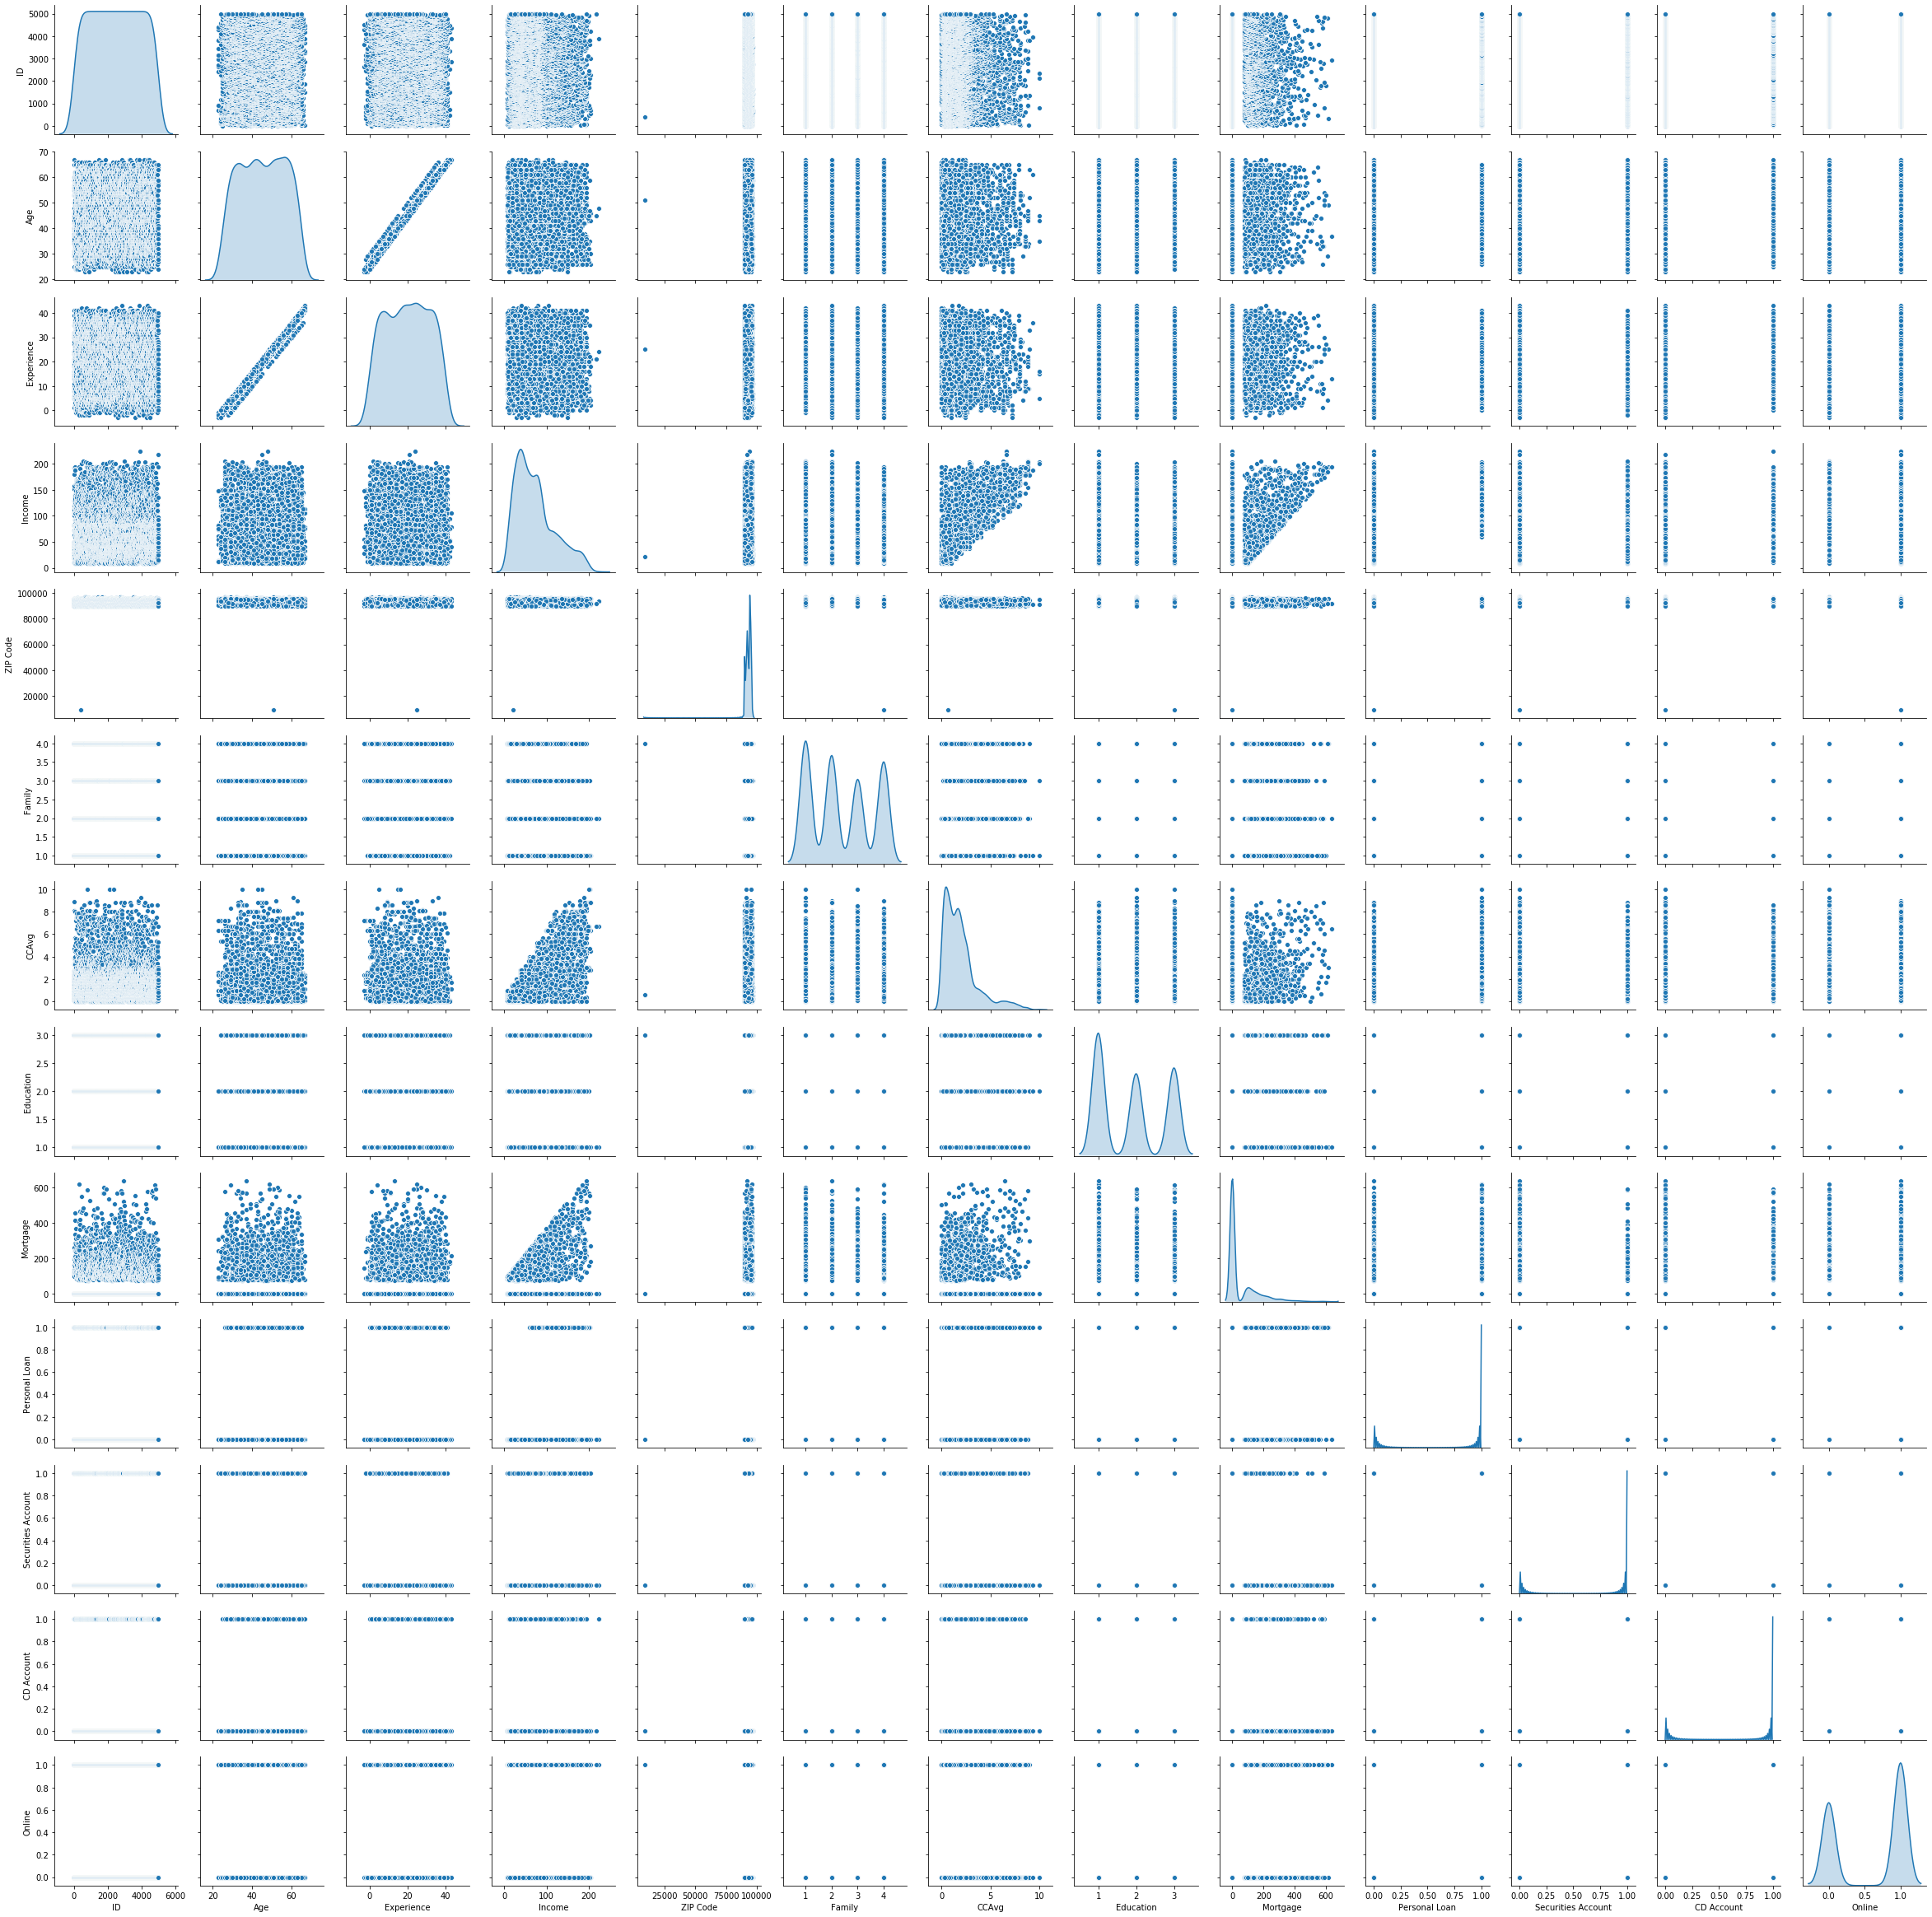

In [78]:
#Check for null values and plot the data
dataset.isnull().sum()
cData_attr = dataset.iloc[:, 0:13]
sns.pairplot(cData_attr, diag_kind='kde')

In [94]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Transform data into features and target
new_data= dataset.drop('Personal Loan',1) 
y = np.array(dataset["Personal Loan"])

X = pd.DataFrame(StandardScaler().fit_transform(new_data))
X.columns = new_data.columns

In [126]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [127]:
print(X_train.shape)
print(y_train.shape)

(3500, 13)
(3500,)


In [128]:
# build logistic regression model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=0, solver='lbfgs')

logisticRegr.fit(X_train, y_train)
logisticRegr.score(X_train, y_train)

0.952

In [129]:
# logisitic regression model: confusion matrix 
pred_test = logisticRegr.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print('Results for Logistic regression')
print('confusion matrix :\n',confusion_matrix(y_test,pred_test))
print('accuracy: ',accuracy_score(y_test, y_pred))
print('recall: ',recall_score(y_test,y_pred))

Results for Logistic regression
confusion matrix :
 [[1341   21]
 [  50   88]]
accuracy:  0.9233333333333333
recall:  0.36231884057971014


In [130]:
# Build the K-nearest neighbour model with different nearest neighbours, tried with 3 different values for neighbours
# and displaying the results

# loading library
from sklearn.neighbors import KNeighborsClassifier
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

#confusion matrix
print('\n\nResults for k-nearest neighbour')
print('confusion matrix for k=3 :\n',confusion_matrix(y_test,y_pred))
print('accuracy for k=3: ',accuracy_score(y_test, y_pred))
print('recall for k=3: ',recall_score(y_test,y_pred))

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
print('\n\nconfusion matrix for k=5 :\n',confusion_matrix(y_test,y_pred))
print('accuracy for k=5: ',accuracy_score(y_test, y_pred))
print('recall for k=5: ',recall_score(y_test,y_pred))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy
# evaluate accuracy
print('\n\nconfusion matrix for k=7 :\n',confusion_matrix(y_test,y_pred))
print('accuracy for k=7: ',accuracy_score(y_test, y_pred))
print('recall for k=7: ',recall_score(y_test,y_pred))



Results for k-nearest neighbour
confusion matrix for k=3 :
 [[1353    9]
 [  58   80]]
accuracy for k=3:  0.9553333333333334
recall for k=3:  0.5797101449275363
0.9553333333333334


confusion matrix for k=5 :
 [[1357    5]
 [  60   78]]
accuracy for k=5:  0.9566666666666667
recall for k=5:  0.5652173913043478


confusion matrix for k=7 :
 [[1354    8]
 [  65   73]]
accuracy for k=7:  0.9513333333333334
recall for k=7:  0.5289855072463768


In [131]:
# Build Naive Bayes for the dataset. most relevant is the bernoulli naive bayes
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [132]:
y_pred=clf.predict(X_test)
#confusion matrix
print('\n\nResults for Naive Bayes with Bernoulli')
print('confusion matrix :\n',confusion_matrix(y_test,y_pred))
print('accuracy : ',accuracy_score(y_test, y_pred))
print('recall : ',recall_score(y_test,y_pred))



Results for Naive Bayes with Bernoulli
confusion matrix :
 [[1335   27]
 [  88   50]]
accuracy :  0.9233333333333333
recall :  0.36231884057971014
